This Jupyter notebook accompanies the paper, "Discoverying senolytics with deep learning". It reproduces the Chemprop model training and prediction steps used in the paper, thereby providing an integrated platform for interested readers to develop and apply their own Chemprop models to senolytic compound discovery.

Key files:
- requirements.txt: A Python requirements file detailing all the package dependencies needed to successfully execute all commands in this notebook.

- train.csv: A CSV file containing the SMILES strings and activity values of compounds in the training set. The default file provided is the training set of 2,352 compounds described in the main text, with activity values defined by the cell viability criteria described in the main text. There are a total of 45 active (ACTIVITY=1) compounds; the remaining compounds are inactive (ACTIVITY=0).

- hyperparameters.json: A JSON file containing key hyperparameters specifying the architecture of the Chemprop model used. By default, the parameters used are: depth=2, dropout=0.0, ffn_num_layers=3, and hidden_size=600, as detailed further in the Methods section of the main text.

- test.csv: A CSV file containing the SMILES strings of compounds for which Chemprop predictions of senolytic activity will be made. The default file provided is the set of 266 curated and experimentally tested compounds in our study, a subset of the 804,959 compounds described in the main text; this smaller subset was provided to facilitate evaluation for setups with less computational power. For the full set of compounds computationally evaluated in the paper, please refer to Supplementary Dataset 2. 

For questions or comments about this notebook, please reach out to felixjwong@gmail.com.

In [26]:
import json
import subprocess
import glob
import numpy
import matplotlib.pyplot as plt

In [2]:
# Check the number of compounds in the training set
TRAIN_SMILES=[];
TRAIN_ACTIVITY=[];
fopen = open("./notebook_files/train.csv");
for line in fopen.readlines()[1:]:
    y = [value for value in line.split('\n')]
    y = y[0].split(",")
    try:
        TRAIN_SMILES.append(y[0])
        TRAIN_ACTIVITY.append(y[1])
    except:
        x = 1;
fopen.close()
print("Number of compounds in training set:" ,len(TRAIN_SMILES),len(TRAIN_ACTIVITY))

Number of compounds in training set: 2352 2352


In [3]:
# Check the Chemprop model hyperparameters
f = open('notebook_files/hyperparameters.json')
data = json.load(f)
for i in data:
    print(i,data[i])
f.close()

depth 2
dropout 0.0
ffn_num_layers 3
hidden_size 600


In [4]:
# Train a binary classifier Chemprop model using the hyperparameters and training data specified, using the env
cmd = 'chemprop_train --data_path notebook_files/train.csv --dataset_type classification --config_path notebook_files/hyperparameters.json --save_dir "notebook_files/checkpoint" --ensemble_size 1 --features_generator rdkit_2d_normalized --no_features_scaling'
print(cmd)
subprocess.call(cmd, shell=True)

chemprop_train --data_path notebook_files/train.csv --dataset_type classification --config_path notebook_files/hyperparameters.json --save_dir "notebook_files/checkpoint" --ensemble_size 1 --features_generator rdkit_2d_normalized --no_features_scaling


Command line
python /Users/felix/opt/anaconda3/envs/chemprop/bin/chemprop_train --data_path notebook_files/train.csv --dataset_type classification --config_path notebook_files/hyperparameters.json --save_dir notebook_files/checkpoint --ensemble_size 1 --features_generator rdkit_2d_normalized --no_features_scaling
Args
{'activation': 'ReLU',
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'alternative_loss_function': None,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': 'notebook_files/hyperparameters.json',
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval

 32%|███▏      | 12/38 [00:02<00:05,  4.66it/s]Loss = 1.1197e-01, PNorm = 52.8375, GNorm = 0.1479, lr_0 = 7.3243e-04

 58%|█████▊    | 22/38 [00:04<00:03,  4.38it/s]Loss = 1.2145e-01, PNorm = 52.8839, GNorm = 0.6195, lr_0 = 8.5405e-04

 84%|████████▍ | 32/38 [00:07<00:01,  4.22it/s]Loss = 5.8090e-02, PNorm = 52.9504, GNorm = 0.1176, lr_0 = 9.7568e-04

100%|██████████| 38/38 [00:08<00:00,  5.00it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 13.35it/s]
                                             Validation auc = 0.744589
  7%|▋         | 2/30 [00:19<04:49, 10.34s/it]Epoch 2

 11%|█         | 4/38 [00:00<00:07,  4.25it/s]Loss = 1.2168e-01, PNorm = 52.9895, GNorm = 0.1873, lr_0 = 9.8238e-04

 37%|███▋      | 14/38 [00:03<00:05,  4.12it/s]Loss = 9.2229e-02, PNorm = 53.0779, GNorm = 0.3746, lr_0 = 9.6078e-04

 63%|██████▎   | 24/38 [00:05<00:03,  4.30it/s]Loss = 6.5127e-02, PNorm = 53.1394, GNorm = 0.1254, lr_0 = 9.3966e-04

 89%|████████▉ | 34/38 [0

 76%|███████▋  | 29/38 [00:07<00:02,  4.03it/s]Loss = 4.9421e-02, PNorm = 53.6631, GNorm = 0.1953, lr_0 = 7.8485e-04

100%|██████████| 38/38 [00:09<00:00,  4.88it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 12.41it/s]
                                             Validation auc = 0.781385
 17%|█▋        | 5/30 [00:48<04:06,  9.88s/it]Epoch 5

  3%|▎         | 1/38 [00:00<00:07,  4.73it/s]Loss = 6.5729e-02, PNorm = 53.7127, GNorm = 0.1592, lr_0 = 7.6760e-04

 29%|██▉       | 11/38 [00:02<00:06,  4.18it/s]Loss = 4.6857e-02, PNorm = 53.7900, GNorm = 0.0462, lr_0 = 7.5073e-04

 55%|█████▌    | 21/38 [00:04<00:04,  4.07it/s]Loss = 6.8831e-02, PNorm = 53.8408, GNorm = 0.1788, lr_0 = 7.3423e-04

 82%|████████▏ | 31/38 [00:07<00:01,  3.76it/s]Loss = 7.7740e-02, PNorm = 53.8839, GNorm = 0.1632, lr_0 = 7.1809e-04

100%|██████████| 38/38 [00:09<00:00,  4.40it/s]
                                               
100%|██████████| 5/5 [00:00<00:00, 12.46it/s]
 

 95%|█████████▍| 36/38 [00:08<00:00,  4.02it/s]Loss = 5.6822e-02, PNorm = 54.2984, GNorm = 0.1236, lr_0 = 5.9978e-04

 97%|█████████▋| 37/38 [00:09<00:00,  3.85it/s]Loss = 1.2951e-01, PNorm = 54.2996, GNorm = 0.5251, lr_0 = 5.9845e-04

100%|██████████| 38/38 [00:09<00:00,  4.39it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 11.96it/s]
                                             Validation auc = 0.819264
 27%|██▋       | 8/30 [01:17<03:35,  9.77s/it]Epoch 8

 24%|██▎       | 9/38 [00:02<00:06,  4.16it/s]Loss = 5.1058e-02, PNorm = 54.3473, GNorm = 0.2207, lr_0 = 5.8529e-04

 50%|█████     | 19/38 [00:04<00:04,  4.17it/s]Loss = 4.1749e-02, PNorm = 54.4010, GNorm = 0.1657, lr_0 = 5.7243e-04

 76%|███████▋  | 29/38 [00:07<00:02,  3.71it/s]Loss = 4.4345e-02, PNorm = 54.4440, GNorm = 0.2669, lr_0 = 5.5985e-04

100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                                               
100%|██████████| 5/5 [00:00<00:00, 11.75it/s]
 

100%|██████████| 38/38 [00:10<00:00,  4.09it/s]
                                               
100%|██████████| 5/5 [00:00<00:00, 11.00it/s]
                                             Validation auc = 0.819264
 37%|███▋      | 11/30 [01:49<03:18, 10.44s/it]Epoch 11

 16%|█▌        | 6/38 [00:01<00:09,  3.50it/s]Loss = 4.0428e-02, PNorm = 54.7296, GNorm = 0.1281, lr_0 = 4.5733e-04

 42%|████▏     | 16/38 [00:04<00:06,  3.51it/s]Loss = 2.9789e-02, PNorm = 54.7592, GNorm = 0.2076, lr_0 = 4.4728e-04

 68%|██████▊   | 26/38 [00:07<00:03,  3.39it/s]Loss = 2.3497e-02, PNorm = 54.7973, GNorm = 0.2139, lr_0 = 4.3745e-04

 95%|█████████▍| 36/38 [00:10<00:00,  3.41it/s]Loss = 4.8135e-02, PNorm = 54.8070, GNorm = 0.5160, lr_0 = 4.2783e-04

100%|██████████| 38/38 [00:10<00:00,  3.92it/s]
                                               
100%|██████████| 5/5 [00:00<00:00, 10.59it/s]
                                             Validation auc = 0.800866
 40%|████      | 12/30 [02:01<03:12, 10.67s/it

  8%|▊         | 3/38 [00:00<00:11,  3.13it/s]Loss = 3.6156e-02, PNorm = 55.0029, GNorm = 0.3406, lr_0 = 3.5735e-04

 34%|███▍      | 13/38 [00:03<00:06,  3.59it/s]Loss = 2.1339e-02, PNorm = 55.0327, GNorm = 1.1690, lr_0 = 3.4949e-04

 61%|██████    | 23/38 [00:06<00:04,  3.19it/s]Loss = 2.5532e-02, PNorm = 55.0440, GNorm = 0.1150, lr_0 = 3.4181e-04

 87%|████████▋ | 33/38 [00:10<00:01,  3.15it/s]Loss = 3.6495e-02, PNorm = 55.0676, GNorm = 0.3096, lr_0 = 3.3430e-04

100%|██████████| 38/38 [00:11<00:00,  4.00it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00,  5.93it/s]
                                             Validation auc = 0.819264
 50%|█████     | 15/30 [02:38<02:56, 11.79s/it]Epoch 15

 13%|█▎        | 5/38 [00:01<00:09,  3.58it/s]Loss = 3.4307e-02, PNorm = 55.0855, GNorm = 0.2187, lr_0 = 3.2695e-04

 39%|███▉      | 15/38 [00:04<00:06,  3.51it/s]Loss = 3.2126e-02, PNorm = 55.1069, GNorm = 0.5945, lr_0 = 3.1976e-04

 66%|██████▌   | 25/38 [

 26%|██▋       | 10/38 [00:02<00:07,  3.88it/s]Loss = 3.3812e-02, PNorm = 55.2093, GNorm = 0.1212, lr_0 = 2.7308e-04

 53%|█████▎    | 20/38 [00:05<00:04,  4.01it/s]Loss = 1.9849e-02, PNorm = 55.2268, GNorm = 0.1803, lr_0 = 2.6708e-04

 79%|███████▉  | 30/38 [00:07<00:02,  3.79it/s]Loss = 3.0470e-02, PNorm = 55.2382, GNorm = 0.1995, lr_0 = 2.6121e-04

100%|██████████| 38/38 [00:09<00:00,  4.93it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 12.25it/s]
                                             Validation auc = 0.820346
 60%|██████    | 18/30 [03:10<02:11, 10.94s/it]Epoch 18

  5%|▌         | 2/38 [00:00<00:08,  4.06it/s]Loss = 2.1653e-02, PNorm = 55.2496, GNorm = 0.2150, lr_0 = 2.5547e-04

 32%|███▏      | 12/38 [00:02<00:06,  4.27it/s]Loss = 2.4804e-02, PNorm = 55.2675, GNorm = 0.0463, lr_0 = 2.4985e-04

 58%|█████▊    | 22/38 [00:05<00:03,  4.58it/s]Loss = 1.6780e-02, PNorm = 55.2826, GNorm = 0.1632, lr_0 = 2.4436e-04

 84%|████████▍ | 32/38 

 45%|████▍     | 17/38 [00:04<00:04,  4.58it/s]Loss = 1.5665e-02, PNorm = 55.3720, GNorm = 0.4936, lr_0 = 2.0869e-04

 71%|███████   | 27/38 [00:06<00:02,  4.01it/s]Loss = 2.3602e-02, PNorm = 55.3828, GNorm = 0.1519, lr_0 = 2.0410e-04

 97%|█████████▋| 37/38 [00:08<00:00,  4.43it/s]Loss = 1.8169e-02, PNorm = 55.4020, GNorm = 0.2707, lr_0 = 1.9961e-04

100%|██████████| 38/38 [00:08<00:00,  5.16it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 13.82it/s]
                                             Validation auc = 0.825758
 70%|███████   | 21/30 [03:37<01:26,  9.65s/it]Epoch 21

 24%|██▎       | 9/38 [00:01<00:06,  4.57it/s]Loss = 2.6762e-02, PNorm = 55.4061, GNorm = 0.1163, lr_0 = 1.9523e-04

 50%|█████     | 19/38 [00:04<00:04,  4.58it/s]Loss = 2.4187e-02, PNorm = 55.4137, GNorm = 0.1436, lr_0 = 1.9094e-04

 76%|███████▋  | 29/38 [00:06<00:01,  4.59it/s]Loss = 1.3876e-02, PNorm = 55.4276, GNorm = 0.4136, lr_0 = 1.8674e-04

100%|██████████| 38/38 

 63%|██████▎   | 24/38 [00:05<00:02,  4.77it/s]Loss = 2.1765e-02, PNorm = 55.4920, GNorm = 0.4932, lr_0 = 1.5948e-04

 89%|████████▉ | 34/38 [00:07<00:00,  4.59it/s]Loss = 9.0661e-03, PNorm = 55.5048, GNorm = 0.3372, lr_0 = 1.5597e-04

100%|██████████| 38/38 [00:08<00:00,  5.14it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 14.14it/s]
                                             Validation auc = 0.831169
 80%|████████  | 24/30 [04:03<00:53,  8.96s/it]Epoch 24

 18%|█▊        | 7/38 [00:01<00:06,  4.79it/s]Loss = 1.1037e-02, PNorm = 55.5127, GNorm = 0.0889, lr_0 = 1.5221e-04

 45%|████▍     | 17/38 [00:03<00:04,  4.64it/s]Loss = 1.2082e-02, PNorm = 55.5190, GNorm = 0.0535, lr_0 = 1.4886e-04

 71%|███████   | 27/38 [00:05<00:02,  4.68it/s]Loss = 1.8918e-02, PNorm = 55.5242, GNorm = 0.5904, lr_0 = 1.4559e-04

 97%|█████████▋| 37/38 [00:08<00:00,  4.59it/s]Loss = 1.4893e-02, PNorm = 55.5265, GNorm = 0.1825, lr_0 = 1.4239e-04

100%|██████████| 38/38 

100%|██████████| 38/38 [00:09<00:00,  4.82it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 12.31it/s]
                                             Validation auc = 0.831169
 90%|█████████ | 27/30 [04:30<00:27,  9.06s/it]Epoch 27

 11%|█         | 4/38 [00:00<00:07,  4.32it/s]Loss = 1.7404e-02, PNorm = 55.5857, GNorm = 0.0210, lr_0 = 1.1893e-04

 37%|███▋      | 14/38 [00:03<00:06,  3.85it/s]Loss = 9.3028e-03, PNorm = 55.5934, GNorm = 0.2849, lr_0 = 1.1632e-04

 63%|██████▎   | 24/38 [00:06<00:03,  4.06it/s]Loss = 1.6520e-02, PNorm = 55.6010, GNorm = 0.4081, lr_0 = 1.1376e-04

 89%|████████▉ | 34/38 [00:08<00:00,  4.15it/s]Loss = 1.0886e-02, PNorm = 55.6055, GNorm = 0.1042, lr_0 = 1.1126e-04

100%|██████████| 38/38 [00:09<00:00,  4.53it/s]
                                               
 80%|████████  | 4/5 [00:00<00:00, 12.14it/s]
                                             Validation auc = 0.831169
 93%|█████████▎| 28/30 [04:40<00:18,  9.26s/it

 80%|████████  | 4/5 [00:00<00:00, 12.07it/s]
                                             Validation auc = 0.831169
100%|██████████| 30/30 [05:00<00:00, 10.01s/it]
Model 0 best validation auc = 0.832251 on epoch 12
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Model 0 test auc = 0.648485                  
Ensemble test auc = 0.648485
1-fold cross validation
	Seed 0 ==> test auc = 0.648485
Overall test auc = 0.648485 +/- 0.000000
Elapsed time = 0:07:25


0

In [5]:
# Use the trained Chemprop model to make predictions on test.csv
cmd = 'chemprop_predict --test_path notebook_files/test.csv --checkpoint_dir "notebook_files/checkpoint" --preds_path "notebook_files/predictions.csv"  --features_generator rdkit_2d_normalized --no_features_scaling'
print(cmd)
subprocess.call(cmd, shell=True)

chemprop_predict --test_path notebook_files/test.csv --checkpoint_dir "notebook_files/checkpoint" --preds_path "notebook_files/predictions.csv"  --features_generator rdkit_2d_normalized --no_features_scaling


266it [00:00, 5171.67it/s]
  0%|          | 0/6 [00:00<?, ?it/s]

Loading training args
Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 266
Predicting with an ensemble of 1 models
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".



100%|██████████| 1/1 [00:48<00:00, 48.21s/it]


Saving predictions to notebook_files/predictions.csv
Elapsed time = 0:01:01


0

In [24]:
# Read in predictions for performing downstream analyses
PRED_SMILES = []
PRED_SCORES = []
for file in glob.glob("./notebook_files/predictions.csv"):
    fopen = open(file);
    for line in fopen.readlines():
        y = [value for value in line.split('\n')]
        y = y[0].split(",")
        try: 
            PRED_SMILES.append(y[0])
            PRED_SCORES.append(float(y[1]))
        except:
            x=1;
    fopen.close()
print('Number of compounds whose scores were predicted:',len(PRED_MOLS))

Number of compounds whose scores were predicted: 266


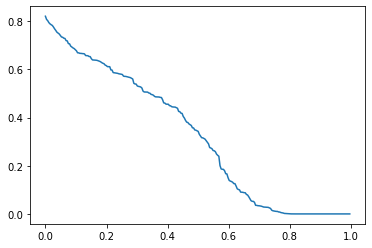

In [29]:
# Plot all the prediction scores, rank-ordered
indi = numpy.argsort(PRED_SCORES)
sor = numpy.take(PRED_SCORES,indi)
xx = [x/len(sor) for x in range(len(sor))]
plt.plot(xx,sor[::-1])
plt.show()